In [1]:
# --- import libraries
import os
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
os.environ["PROJ_LIB"] = "C:/Users/admin/Anaconda3/Library/share"
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import datetime

In [2]:
# --- path
path = '../'
inp_dir = path + 'inp_data/'
out_dir = path + 'out_data/'
mid_dir = path + 'mid_dir/'
plt_dir = path + 'plots/'

In [3]:
map_lims = [26, 46, 126, 146, 4, 4]

In [4]:
# === plot map
def plot_map(var1d, lats, lons, sites, plot_name, title, yr):

    from matplotlib.font_manager import FontProperties

    fp = FontProperties(fname=r'C:\WINDOWS\Fonts\msgothic.ttc', size=5)

    # --- Build Map ---
    fig = plt.figure()
    plt.rc('font', family='serif')
    my_cmap = plt.get_cmap('rainbow')
    font_size = 10

    # --- map labels ---
    mp = Basemap(projection='gall', llcrnrlat=map_lims[0], urcrnrlat=map_lims[1],
                 llcrnrlon=map_lims[2], urcrnrlon=map_lims[3], resolution='l')
    mp.drawcoastlines(color='grey')
    mp.drawcountries(color='grey')
    mp.drawparallels(np.arange(-90, 91, map_lims[4]), labels=[True, False, True, False],
                     fontsize=font_size, color='grey')
    mp.drawmeridians(np.arange(2, 362, map_lims[5]), labels=[False, True, False, True],
                     fontsize=font_size, color='grey')

    x, y = mp(lons, lats)
    mp.scatter(x, y, c=var1d, s=10, cmap=my_cmap)

    # --- selected sites
    o_site = ''
    for j in range(0, len(sites), 1):
        n_lat = lats[j]
        n_lon = lons[j]
        n_site = sites[j]

        # --- plot only unploted sites
        # if n_site != o_site:
        if n_site[:1] != o_site[:1]:
            x, y = mp(n_lon, n_lat)
            plt.text(x, y, n_site, color='k', weight='bold', fontsize=font_size - 6, fontproperties=fp)
        o_site = sites[j]


    # --- title
    plt.title(title + ' for ' + yr)

    # --- legend
    # plt.legend(loc="lower left", ncol=4, prop={'size': font_size - 4}, fancybox=True, shadow=True)
    plt.colorbar()

    # --- save to plot
    save_plot(plot_name, ext="png", close=True, verbose=False)
    plt.show()

In [5]:
def save_plot(path, ext='png', close=True, verbose=True):

    """Save a figure from pyplot.
    Parameters
    ----------
    path : string
        The path (and filename, without the extension) to save the
        figure to.
    ext : string (default='png')
        The file extension. This must be supported by the active
        matplotlib backend (see matplotlib.backends module).  Most
        backends support 'png', 'pdf', 'ps', 'eps', and 'svg'.
    close : boolean (default=True)
        Whether to close the figure after saving.  If you want to save
        the figure multiple times (e.g., to multiple formats), you
        should NOT close it in between saves or you will have to
        re-plot it.
    verbose : boolean (default=True)
        Whether to print information about when and where the image
        has been saved.
    """
    # --- Extract the directory and filename from the given path
    directory = os.path.split(path)[0]
    filename = "%s.%s"%(os.path.split(path)[1], ext)
    if directory == '':
        directory = '.'

    # --- If the directory does not exist, create it
    if not os.path.exists(directory):
        os.makedirs(directory)

    # --- The final path to save to
    savepath = os.path.join(directory, filename)

    if verbose:
        print('\t\tSaving figure to: ', savepath)

    # --- Actually save the figure
    plt.savefig(savepath, dpi=600, bbox_inches='tight')

    # --- Close it
    if close:
        plt.close()

    if verbose:
        print('\t\tplot_save - OK')

In [6]:
# --- map processing
def proc_map(yr):

    # --- pd settings
    pd.set_option('expand_frame_repr', False)

    # --- files to read
    file_d = inp_dir + 'TD' + yr + '0600.txt'
    file_m = inp_dir + 'TM' + yr + '0000.txt'
    print('File to read:', file_m, file_d)

    # --- read
    df_d = pd.read_csv(file_d, encoding='cp932')
    df_m = pd.read_csv(file_m, encoding='cp932')
    #df_m = pd.read_csv(file_m, encoding='utf-8')

    # --- subset
    df_d1 = df_d[['測定局コード', '昼間の１時間値の最高値(ppm)', '昼間の日最高１時間値の年平均値(ppm)']]
    df_d1.set_index('測定局コード', inplace=True)

    df_m1 = df_m[['国環研局番', '同左_ローマ字', '都道府県名', '市区町村名', '緯度_度', '緯度_分', '緯度_秒', '経度_度', '経度_分', '経度_秒']]
    df_m1.rename({'国環研局番': '測定局コード'}, axis='columns', inplace=True)
    df_m1.set_index('測定局コード', inplace=True)

    # --- joint df
    df_a = pd.concat([df_m1, df_d1], axis=1)
    #df_a.dropna(inplace=True)

    # --- check data
    print('Working datasets' + ' for ' + yr)
    print(df_d1.head())
    print(df_m1.head())
    print(df_a.head())

    # --- lat/lons
    # var1d = df_a['OX_測定高度(m)'].values
    # lats = df_a['緯度_度'].values + df_a['緯度_分'].values / 60 + df_a['緯度_秒'].values / 3600
    # lons = df_a['経度_度'].values + df_a['経度_分'].values / 60 + df_a['経度_秒'].values / 3600
    # sites = df_a['同左_ローマ字'].values
    # sites = df_a['市区町村名'].values

    # --- data to plot
    n_var = ['昼間の１時間値の最高値(ppm)', '昼間の日最高１時間値の年平均値(ppm)']
    n_drp = ['昼間の日最高１時間値の年平均値(ppm)', '昼間の１時間値の最高値(ppm)']
    n_ttl = ['Maximum O$_3$, ppm', 'Average O$_3$, ppm']
    n_fll = ['Maximum_O3', 'Average_O3']

    # --- loop
    for l in range(0, len(n_var)):
        df_plt = df_a.copy()
        df_plt.drop(n_drp[l], axis=1, inplace=True)
        df_plt.dropna(inplace=True)

        # --- data to plot
        var1d = df_plt[n_var[l]].values
        lats = df_plt['緯度_度'].values + df_plt['緯度_分'].values / 60 + df_plt['緯度_秒'].values / 3600
        lons = df_plt['経度_度'].values + df_plt['経度_分'].values / 60 + df_plt['経度_秒'].values / 3600
        # sites = df_plt['同左_ローマ字'].values
        # sites = df_plt['市区町村名'].values
        sites = df_plt['都道府県名'].values

        # --- plot map if var1d not empty
        if var1d != []:
            plot_name = plt_dir + n_fll[l] + '_' + yr
            title = n_ttl[l]
            plot_map(var1d, lats, lons, sites, plot_name, title, yr)

In [7]:
# --- start and end years
#years = [1973, 1975]
#for yr in range(years[0], years[1]):
#    proc_map(str(yr))

In [8]:
# --- map processing
def proc_sites(yr):
    import datetime

    # --- pd settings
    pd.set_option('expand_frame_repr', False)

    # --- files to read
    file_s = inp_dir + yr + '_40202010.csv'
    print('\nFile to read:', file_s)

    # --- read
    df_s = pd.read_csv(file_s, encoding='cp932')
    print('\n\tOriginal df len:', len(df_s))

    # --- cut OX data only
    df_o = df_s[df_s['測定項目コード'] == 'OX  ']
    #print('\n\tOX data only df len:', len(df_o))
    #print(df_o.head())
    
    # --- cut wrong days and add index
    df = df_o.copy()
    index = []
    for i in range(0, len(df_o)):
        try:
            yr = df_o['測定年度'].values[i]
            mn = df_o['測定月'].values[i]
            dy = df_o['測定日'].values[i]
            index.append(datetime.datetime(yr, mn, dy, 0, 0))
        except:
            print('\tRemoved:', yr, mn, dy)
            df.drop(df.index[[i]], inplace=True)
    

    df['index'] = index
    print('\n\tAfter wrong days removing df len :', len(df))

    # --- remove unused columns
    df.drop(['測定年度', '測定月', '測定日', '測定局コード', '市町村コード', '測定項目コード', '測定単位コード'], axis=1, inplace=True)
    #print('\n\tCut wrong days and add index:', len(df_o))
    #print(df.head())
               
    # --- values from rows to columns
    df_t = df.melt(id_vars=['index'])
    #print('\n\tValues from rows to columns:', len(df_o))
    #print(df_t.head())
    
    # --- add hours to index
    df_t['hour'] = df_t.apply(lambda row: int(str(row['variable'])[:-1]), axis=1)

    # --- conver 24h to 00h of next day
    index = []
    dts = df_t['index'].tolist()
    hrs = df_t['hour'].values
    for i in range(0, len(df_t)):
    #for i in range(8000, 8100):
        try:
            dt = dts[i]
            hr = hrs[i]
            index.append(dt.replace(hour=hr))
        except ValueError:
            dt = dt.replace(hour=23)
            dt += datetime.timedelta(hours=1)
            index.append(dt)
        #print(dts[i], hrs[i], dt)
    
      
    df_t['index'] = index
    df_t.set_index('index', inplace=True)
    df_t.sort_index(inplace=True, ascending=1)
    #print(df_t.iloc[370:385,:])
    
    # --- drop unnecessary, rename, remove undef (9999)
    df_t.drop(['variable', 'hour'], axis=1, inplace=True)
    df_t.rename(columns={'value':'OX'}, inplace=True)
    #df_t['OX'] = df_t.apply(lambda row: row['value'] if row['value'] < 999, axis=1)

    #df_t['OX'] = df_t.apply(lambda row: row['OX'] , axis=1)
    df_t['OX'] = df_t.OX.apply(lambda x: x if x < 9900 else np.nan)
    
    print('\n\tOX data final df len:', len(df_o))
    print(df_t.head())
    
    return df_t
    
yr = 2016
df = proc_sites(str(yr))


File to read: ../inp_data/2016_40202010.csv

	Original df len: 5580
	Removed: 2016 4 31
	Removed: 2016 6 31
	Removed: 2016 9 31
	Removed: 2016 11 31
	Removed: 2016 2 30
	Removed: 2016 2 31

	After wrong days removing df len : 366

	OX data final df len: 372
                       OX
index                    
2016-01-01 01:00:00  12.0
2016-01-01 02:00:00  15.0
2016-01-01 03:00:00  14.0
2016-01-01 04:00:00   7.0
2016-01-01 05:00:00   8.0


In [9]:
print(df.head(10))
dts = df.index.tolist()
dt = dts[0]
print(dt)
dt = dt.replace(hour=23)
print(dt)

                       OX
index                    
2016-01-01 01:00:00  12.0
2016-01-01 02:00:00  15.0
2016-01-01 03:00:00  14.0
2016-01-01 04:00:00   7.0
2016-01-01 05:00:00   8.0
2016-01-01 06:00:00  11.0
2016-01-01 07:00:00  10.0
2016-01-01 08:00:00   9.0
2016-01-01 09:00:00  11.0
2016-01-01 10:00:00  15.0
2016-01-01 01:00:00
2016-01-01 23:00:00


In [10]:
df.plot()
plot_name = plt_dir + 'Ox_h_' + str(yr)
save_plot(plot_name, ext="png", close=True, verbose=False)
plt.show()

,OX
index,
2016-01-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2016-02-29,"AxesSubplot(0.125,0.125;0.775x0.755)"
2016-03-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2016-04-30,"AxesSubplot(0.125,0.125;0.775x0.755)"
2016-05-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2016-06-30,"AxesSubplot(0.125,0.125;0.775x0.755)"
2016-07-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2016-08-31,"AxesSubplot(0.125,0.125;0.775x0.755)"
2016-09-30,"AxesSubplot(0.125,0.125;0.775x0.755)"


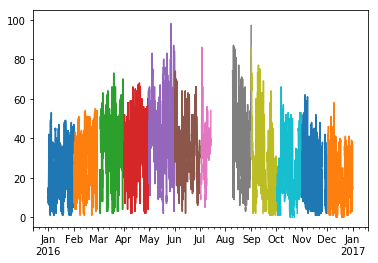

In [11]:
df.resample('m').plot()

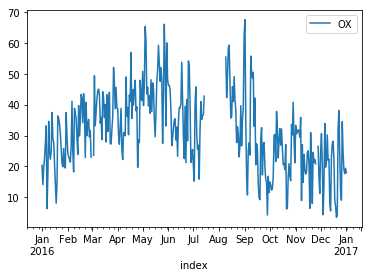

In [20]:
df.resample('d').mean().plot()
#plot_name = plt_dir + 'Ox_d_' + str(yr)
#save_plot(plot_name, ext="png", close=True, verbose=False)
#plt.show()

In [13]:
print(df.head())

                       OX
index                    
2016-01-01 01:00:00  12.0
2016-01-01 02:00:00  15.0
2016-01-01 03:00:00  14.0
2016-01-01 04:00:00   7.0
2016-01-01 05:00:00   8.0


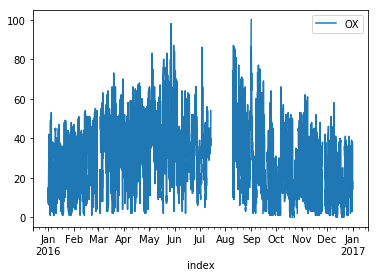

In [14]:
df.plot()